<a href="https://colab.research.google.com/github/StellarPulse/Car-Price-Predication/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Preprocessing

In [2]:
car_dataset = pd.read_csv('car data.csv')
car_dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


Encoding the Categorial Data

In [3]:
# encoding "fuel" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "seller_type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [4]:
car_dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


Splitting the dataset

In [6]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Training the model

In [10]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train,Y_train)

filename = 'CarPricePrediction_LinearRegression.train'
pickle.dump(lin_reg_model, open(filename,'wb'))

Model Evaluation

In [20]:
training_data_prediction = lin_reg_model.predict(X_train)
training_data_prediction

test_data_prediction = lin_reg_model.predict(X_test)
test_data_prediction

array([10.39222503,  0.71269634,  4.26367425,  4.89542882,  9.84484784,
        4.22631808,  7.1173891 ,  7.37327394,  0.1592961 ,  5.16712598,
        6.20624893,  6.17414198,  2.11880837,  7.74045843,  1.92235986,
        1.71406658,  2.02899942,  1.8536463 ,  9.35171759,  4.2546458 ,
        1.48996098,  9.14496453,  1.45846216,  9.63402658,  0.82165042,
        8.07898502,  1.53763892, -3.19873666,  4.22373915,  2.09526116,
        3.42865389,  3.72427545,  5.58001877,  7.75879392, -1.91563192,
        6.80980082,  8.20694812,  5.81047156,  6.15629896,  6.27493028,
       16.02197751,  2.07455343,  1.04886513, -0.45830577,  6.82090538,
        6.78567581,  0.98725428,  6.83257783, 14.31925066,  3.01359825,
        8.04481951, -0.89441322,  8.99139759,  1.14814903,  2.1191082 ,
       -0.82919712,  0.68456956, 10.02743111, -0.46773344, -2.43254957,
       10.0831552 ])

In [21]:
error_score1 = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error (Train Data) : ", error_score1*100,'%')
Y_train
error_score2 = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error (Test Data) : ", error_score2*100,'%')

R squared Error (Train Data) :  88.38169193709795 %
R squared Error (Test Data) :  84.01532365377697 %


Visualizing the actual and predicted prices

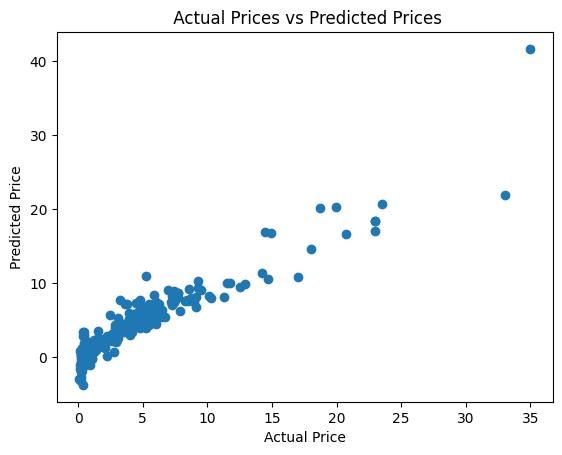

In [23]:
# on train data
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

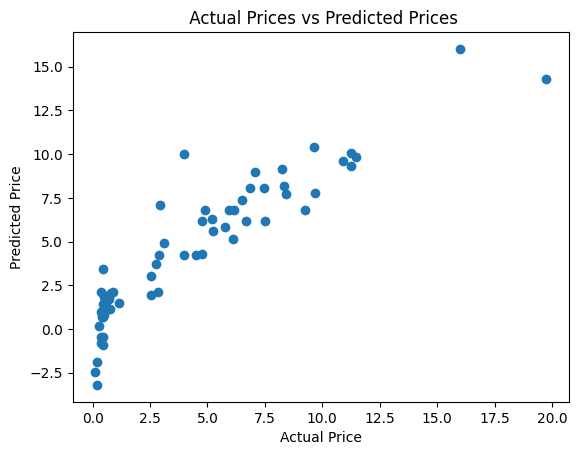

In [24]:
# on test data
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()
